In [71]:
import os
import csv
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [72]:
cpi_ten_years_data_file = Path("cpi_ten_years.csv")
indeed_country_data_file = Path("Hiring_Lab_subset_country_data_to_2023-07-28.csv")
indeed_illinois_data_file = Path("Hiring_Lab_subset_states_data_to_2023-07-28.csv")
unemploy_ave_and_pop_illinois_data_file = Path("unemployment_averages_and_population_il.csv")
unemploy_five_years_illinois_data_file = Path("unemployment_il_five_years.csv")
unemploy_five_years_national_data_file = Path("unemployment_national_five_years.csv")

cpi_ten_years = pd.read_csv(cpi_ten_years_data_file)
indeed_country = pd.read_csv(indeed_country_data_file)
indeed_illinois = pd.read_csv(indeed_illinois_data_file)
unemploy_ave_and_pop_illinois = pd.read_csv(unemploy_ave_and_pop_illinois_data_file)
unemploy_five_years_illinois = pd.read_csv(unemploy_five_years_illinois_data_file)
unemploy_five_years_national = pd.read_csv(unemploy_five_years_national_data_file)

In [73]:
#cpi_ten_years.tail()

In [74]:
#cpi_five_years = cpi_ten_years.loc[['2018', '2019', '2020', '2021', '2022', '2023']]

YTD = []

cpi_ten_years["YTD"] = 0
cpi_five_years = cpi_ten_years.iloc[5:11, :].fillna(0)
cpi_five_years_clean = cpi_five_years[['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'YTD']]
# cpi_five_years_clean_reset = cpi_five_years_clean.reset_index('Year', inplace=True, drop=True) *need the inplace and drop in there too!
# cpi_five_years_clean
# thought we could use this somewhere, but didn't... pd.to_numeric(row)

In [75]:
for index, row in cpi_five_years_clean.iterrows():
    year_sum = row.iloc[1:13].sum()
    YTD.append(year_sum)

cpi_five_years_clean["YTD"] = YTD
#    print(row.iloc[1:13].sum())
#YTD_df = pd.DataFrame({
#                        "YTD": YTD
#})

cpi_five_years_clean

#cpi_merged_df = pd.merge(cpi_five_years_clean, YTD_df, on=["Year", "YTD"], how="right") 
#cpi_merged_df

#print(row)
# YTD.append()

#cpi_five_years_clean.loc[:, 'YTD'] = cpi_five_years_clean.iloc[].sum(numeric_only=True, axis=1)   
    
#    print(cpi_five_years_clean.iloc[1].sum())
#    cpi_five_years_clean.iloc[1].sum()
    
#   try:
#        cpi_five_years_clean.loc[index].sum() == year_sum
#    except (KeyError, IndexError):
#        cpi_five_years_months = 0

#year_sum

#fillna needs to be set to a dataframe, like below (or above), not just because..
#cpi_five_years_clean2 = cpi_five_years_clean.fillna(0)
#cpi_five_years_clean2

/var/folders/bv/qm823v2n5dq9ksz3d07cgb4r0000gn/T/ipykernel_62344/2783017954.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cpi_five_years_clean["YTD"] = YTD


,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
5,2018,0.4,0.3,0.0,0.3,0.2,0.1,0.1,0.2,0.2,0.2,-0.1,0.1,2.0
6,2019,0.0,0.2,0.3,0.4,0.0,-0.1,0.2,0.1,0.2,0.3,0.2,0.3,2.1
7,2020,0.2,0.1,-0.4,-0.8,-0.1,0.4,0.5,0.4,0.2,0.1,0.2,0.5,1.3
8,2021,0.2,0.4,0.5,0.7,0.7,0.8,0.4,0.4,0.4,0.9,0.8,0.8,7.0
9,2022,0.6,0.7,1.0,0.4,0.9,1.2,0.0,0.2,0.4,0.5,0.2,0.1,6.2
10,2023,0.5,0.4,0.1,0.4,0.1,0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.7


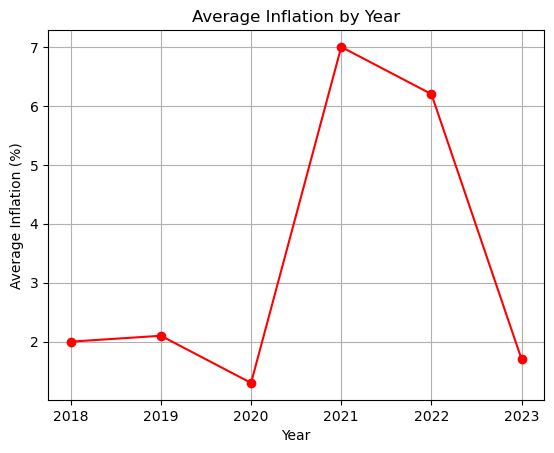

In [76]:
# line graph all XXX
# line graph by year

plt.plot(cpi_five_years_clean["Year"], cpi_five_years_clean["YTD"], color = 'red', marker = 'o')
plt.xlabel("Year")
plt.ylabel("Average Inflation (%)")
plt.title("Average Inflation by Year")
plt.savefig("cpi_average.svg")
plt.grid()
plt.show()

In [77]:
#indeed_country.head()

#index = feb 01, 2020, 100%

#groupby month and year?

indeed_country_clean = indeed_country[['Date', 'Seasonally adjusted percentage', 'Non-seasonally adjusted percentage']]
indeed_country_clean = indeed_country_clean.astype({"Date": "datetime64"})

# inspiration from https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/
indeed_country_clean_year = indeed_country_clean.groupby(pd.Grouper(key='Date', freq='Y')).mean()
indeed_country_clean_year

#indeed_country_clean_year.dtypes
#indeed_country_clean.head()

,Seasonally adjusted percentage,Non-seasonally adjusted percentage
Date,,
2020-12-31,83.442388,86.943284
2021-12-31,130.227945,135.376712
2022-12-31,153.771507,159.743562
2023-12-31,134.047368,139.406220


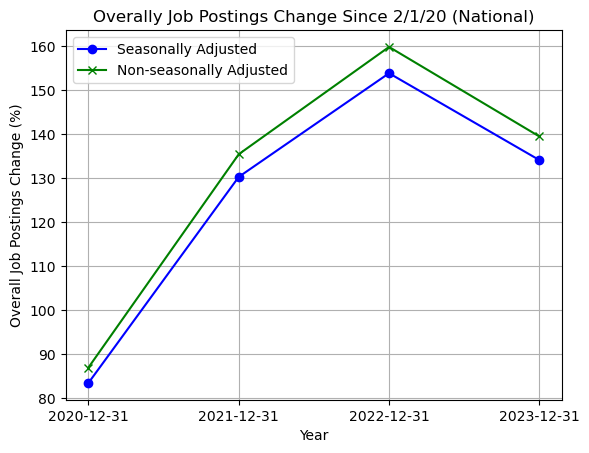

In [97]:
indeed_country_graph = indeed_country_clean_year.reset_index(drop=False, inplace=False)

plt.plot(indeed_country_graph["Date"], indeed_country_graph["Seasonally adjusted percentage"], marker = 'o', color = 'blue', label = "Seasonally Adjusted")
plt.plot(indeed_country_graph["Date"], indeed_country_graph["Non-seasonally adjusted percentage"], marker = 'x', color = 'green', label = "Non-seasonally Adjusted")
plt.xlabel("Year")
plt.xticks(indeed_country_graph["Date"])
plt.ylabel("Overall Job Postings Change (%)")
plt.title("Overally Job Postings Change Since 2/1/20 (National)")
plt.legend(loc = "best")
plt.savefig("indeed_country.svg")
plt.grid()
plt.show()

In [79]:
#indeed_illinois.head()

#groupby month and year

indeed_illinois_clean = indeed_illinois[['Date', 'Seasonally adjusted percentage', 'Non-seasonally adjusted percentage']]
indeed_illinois_clean = indeed_illinois_clean.astype({"Date": "datetime64"})

# inspiration from https://www.geeksforgeeks.org/how-to-group-pandas-dataframe-by-date-and-time/
indeed_illinois_clean_year = indeed_illinois_clean.groupby(pd.Grouper(key='Date', freq='Y')).mean()
#indeed_illinois_clean_year

indeed_illinois_clean.head()

,Date,Seasonally adjusted percentage,Non-seasonally adjusted percentage
0,2020-02-01,100.0,100.0
1,2020-02-02,100.0,100.1
2,2020-02-03,100.0,100.2
3,2020-02-04,100.1,100.4
4,2020-02-05,100.2,100.5


In [80]:
indeed_illinois_clean_year

,Seasonally adjusted percentage,Non-seasonally adjusted percentage
Date,,
2020-12-31,80.255522,83.871343
2021-12-31,126.566027,131.956712
2022-12-31,146.264384,152.383014
2023-12-31,122.235885,127.181340


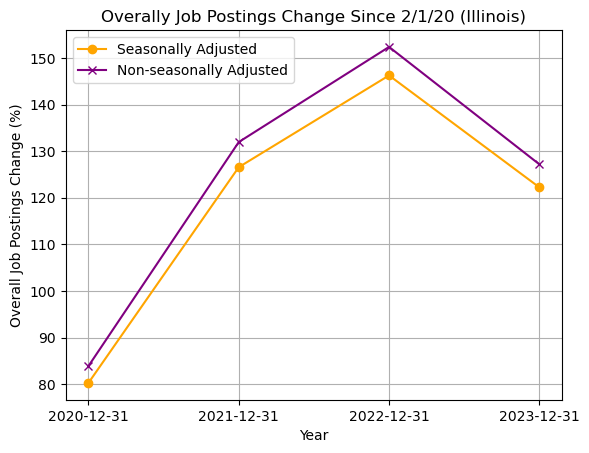

In [98]:
indeed_illinois_graph = indeed_illinois_clean_year.reset_index(drop=False, inplace=False)

plt.plot(indeed_illinois_graph["Date"], indeed_illinois_graph["Seasonally adjusted percentage"], marker = 'o', color = 'orange', label = "Seasonally Adjusted")
plt.plot(indeed_illinois_graph["Date"], indeed_illinois_graph["Non-seasonally adjusted percentage"], marker = 'x', color = 'purple', label = "Non-seasonally Adjusted")
plt.xlabel("Year")
plt.xticks(indeed_illinois_graph["Date"])
plt.ylabel("Overall Job Postings Change (%)")
plt.title("Overally Job Postings Change Since 2/1/20 (Illinois)")
plt.legend(loc = "best")
plt.savefig("indeed_illinois.svg")
plt.grid()
plt.show()

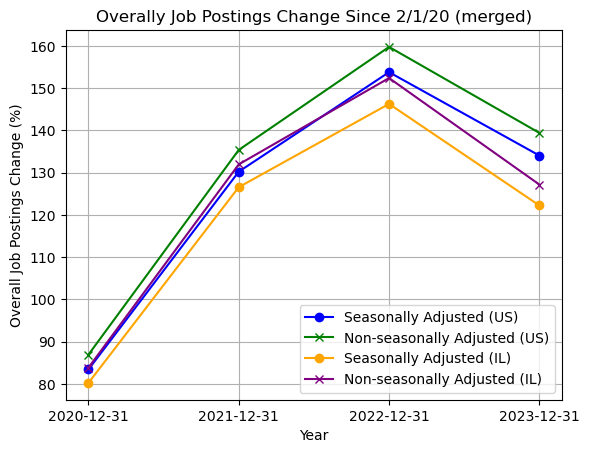

In [99]:
#plt.plot(indeed_sap_country)
#plt.plot(indeed_nsap_country)
#plt.plot(indeed_sap_illinois)
#plt.plot(indeed_nsap_illinois)

plt.plot(indeed_country_graph["Date"], indeed_country_graph["Seasonally adjusted percentage"], marker = 'o', color = 'blue', label = "Seasonally Adjusted (US)")
plt.plot(indeed_country_graph["Date"], indeed_country_graph["Non-seasonally adjusted percentage"], marker = 'x', color = 'green', label = "Non-seasonally Adjusted (US)")
plt.plot(indeed_illinois_graph["Date"], indeed_illinois_graph["Seasonally adjusted percentage"], marker = 'o', color = 'orange', label = "Seasonally Adjusted (IL)")
plt.plot(indeed_illinois_graph["Date"], indeed_illinois_graph["Non-seasonally adjusted percentage"], marker = 'x', color = 'purple', label = "Non-seasonally Adjusted (IL)")
plt.xlabel("Year")
plt.xticks(indeed_illinois_graph["Date"])
plt.ylabel("Overall Job Postings Change (%)")
plt.title("Overally Job Postings Change Since 2/1/20 (merged)")
plt.legend(loc = "best")
plt.savefig("indeed_merged.svg")
plt.grid()
plt.show()

In [83]:
#unemploy_ave_and_pop_illinois.head()

#replace NaN with 0?
#groupby month and year
#filter for years 2018 to 2023

In [84]:
#unemploy_ave_and_pop_illinois[]
unemploy_ave_and_pop_illinois = unemploy_ave_and_pop_illinois.rename(columns={"Value Unemploy": "Total Unemployed",
                                                                                "Yearly average unemploy": "Yearly Average Unemployed",
                                                                                "Il Pop": "Illinois Population"
                                                                                })

unemploy_ave_and_pop_illinois_clean = unemploy_ave_and_pop_illinois[['Year', 'Label', 'Total Unemployed', 'Yearly Average Unemployed', 'Illinois Population']]
unemploy_ave_and_pop_illinois_clean.dropna()

,Year,Label,Total Unemployed,Yearly Average Unemployed,Illinois Population
0,2013,2013 Jan,605461,594350.5000,12882135.0
12,2014,2014 Jan,547499,467472.5000,12880580.0
24,2015,2015 Jan,396152,391319.9167,12859995.0
36,2016,2016 Jan,407415,386372.6667,12801539.0
48,2017,2017 Jan,346578,324413.5833,12802023.0
60,2018,2018 Jan,299294,287547.9167,12741080.0
72,2019,2019 Jan,301759,259930.3333,12671821.0
96,2021,2021 Jan,454854,387852.4167,12671469.0


In [85]:
#unemploy_ave_and_pop_illinois_clean.describe()

In [86]:
percent_unemployed = []

for index, row in unemploy_ave_and_pop_illinois_clean.iterrows():
    percent_unemploy = 100 * (row["Total Unemployed"] / row["Illinois Population"])
    percent_unemployed.append(percent_unemploy)

unemploy_ave_and_pop_illinois_clean["Percent Unemployed"] = percent_unemployed
unemploy_ave_and_pop_illinois_clean = unemploy_ave_and_pop_illinois_clean.dropna()
unemploy_ave_and_pop_illinois_clean

/var/folders/bv/qm823v2n5dq9ksz3d07cgb4r0000gn/T/ipykernel_62344/1548904047.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unemploy_ave_and_pop_illinois_clean["Percent Unemployed"] = percent_unemployed


,Year,Label,Total Unemployed,Yearly Average Unemployed,Illinois Population,Percent Unemployed
0,2013,2013 Jan,605461,594350.5000,12882135.0,4.700005
12,2014,2014 Jan,547499,467472.5000,12880580.0,4.250577
24,2015,2015 Jan,396152,391319.9167,12859995.0,3.080499
36,2016,2016 Jan,407415,386372.6667,12801539.0,3.182547
48,2017,2017 Jan,346578,324413.5833,12802023.0,2.707213
60,2018,2018 Jan,299294,287547.9167,12741080.0,2.349047
72,2019,2019 Jan,301759,259930.3333,12671821.0,2.381339
96,2021,2021 Jan,454854,387852.4167,12671469.0,3.589592


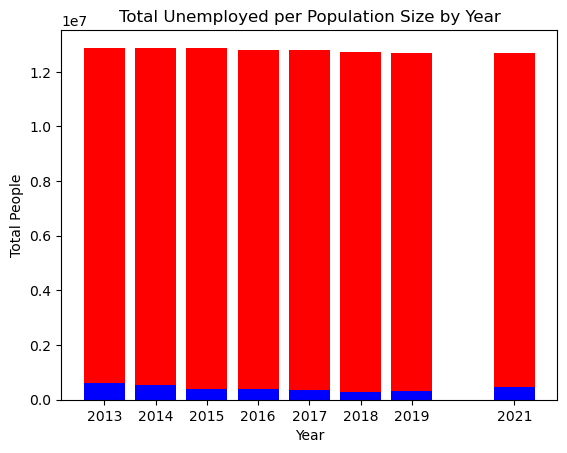

In [87]:
# bar chart of total unemployed and illinois population
# line graph of percent unemployed

plt.bar(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Illinois Population"], color = 'r')
plt.bar(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Total Unemployed"], color = 'b')
plt.xticks(unemploy_ave_and_pop_illinois_clean["Year"])
#plt.yticks(scipy.arange(0,12890000,500000))
#plt.rcParams["figure.autolayout"] = True
#max_y_lim = 13500000
#min_y_lim = 12000000
#plt.ylim(min_y_lim, max_y_lim)

plt.xlabel("Year")
plt.ylabel("Total People")
plt.title("Total Unemployed per Population Size by Year")
#plt.legend()
plt.savefig("illinois_unemployment_stacked_bar.svg")
plt.show()

#unemploy_ave_and_pop_illinois_clean

In [88]:
#unemploy_ave_and_pop_illinois_clean["Year"]

In [89]:
#unemploy_ave_and_pop_illinois_clean["Percent Unemployed"]

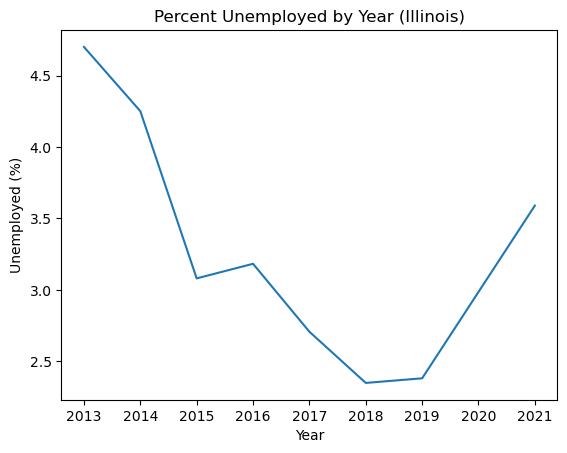

In [90]:
plt.plot(unemploy_ave_and_pop_illinois_clean["Year"], unemploy_ave_and_pop_illinois_clean["Percent Unemployed"])
plt.xlabel("Year")
plt.ylabel("Unemployed (%)")
plt.title("Percent Unemployed by Year (Illinois)")
plt.savefig("illinois_percent_unemployment.svg")
plt.show()

In [91]:
#unemploy_ave_and_pop_illinois_clean.dtypes

In [103]:
#unemploy_five_years_illinois.head()

#replace NaN with 0?
#groupby month and YEAR; WHAT TO DO WITH VALUE COLUMN, MEAN?
#filter for years 2018 to 2023

unemploy_five_years_illinois_clean = unemploy_five_years_illinois[['Year', 'Period', 'Label', 'Value']]
unemploy_five_years_illinois_clean

#unemploy_five_years_illinois_clean_byyear = unemploy_five_years_illinois_clean.groupby('Year')['Value'].mean()
#unemploy_five_years_illinois_clean_byyear

,Year,Period,Label,Value
0,2018,M01,2018 Jan,299294
1,2018,M02,2018 Feb,292204
2,2018,M03,2018 Mar,286440
3,2018,M04,2018 Apr,281853
4,2018,M05,2018 May,279046
...,...,...,...,...
61,2023,M02,2023 Feb,289854
62,2023,M03,2023 Mar,283806
63,2023,M04,2023 Apr,275010
64,2023,M05,2023 May,265222


In [93]:
#unemploy_five_years_national

YTD_national = []

unemploy_five_years_national["YTD"] = ""
unemploy_five_years_national


for index, row in unemploy_five_years_national.iterrows():
    year_sum_national = row.iloc[1:13].mean()
    YTD_national.append(year_sum_national)

unemploy_five_years_national["YTD"] = YTD
unemploy_five_years_national

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,YTD
0,2018,4.0,4.1,4.0,4.0,3.8,4.0,3.8,3.8,3.7,3.8,3.8,3.9,2.0
1,2019,4.0,3.8,3.8,3.6,3.7,3.6,3.7,3.7,3.5,3.6,3.6,3.6,2.1
2,2020,3.5,3.5,4.4,14.7,13.2,11.0,10.2,8.4,7.9,6.9,6.7,6.7,1.3
3,2021,6.3,6.2,6.1,6.1,5.8,5.9,5.4,5.2,4.8,4.5,4.2,3.9,7.0
4,2022,4.0,3.8,3.6,3.6,3.6,3.6,3.5,3.7,3.5,3.7,3.6,3.5,6.2
5,2023,3.4,3.6,3.5,3.4,3.7,3.6,3.5,NaN,NaN,NaN,NaN,NaN,1.7


In [94]:
illinois_unemploy_graph = unemploy_ave_and_pop_illinois_clean.loc[unemploy_ave_and_pop_illinois_clean["Year"] > 2017]
illinois_unemploy_graph

,Year,Label,Total Unemployed,Yearly Average Unemployed,Illinois Population,Percent Unemployed
60,2018,2018 Jan,299294,287547.9167,12741080.0,2.349047
72,2019,2019 Jan,301759,259930.3333,12671821.0,2.381339
96,2021,2021 Jan,454854,387852.4167,12671469.0,3.589592


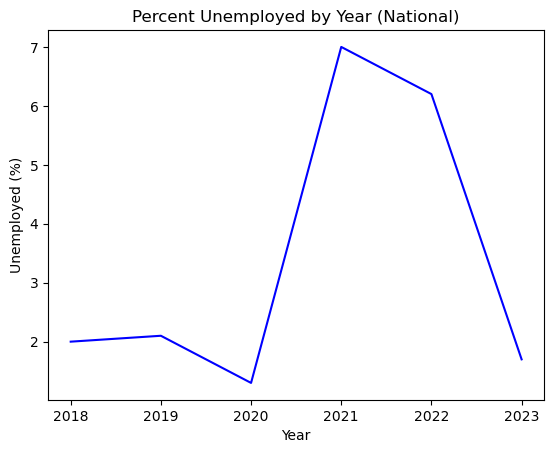

In [95]:
plt.plot(unemploy_five_years_national["Year"], unemploy_five_years_national["YTD"], color = 'blue')
plt.xlabel("Year")
plt.ylabel("Unemployed (%)")
plt.title("Percent Unemployed by Year (National)")
plt.savefig("percent_unemployment_national.svg")
plt.show()

ValueError: x and y must have same first dimension, but have shapes (6,) and (3,)

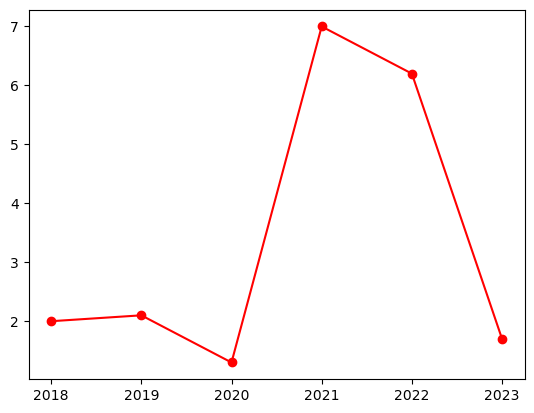

In [96]:
cpi = plt.plot(cpi_five_years_clean["Year"], cpi_five_years_clean["YTD"], marker = 'o', color = 'red', label = "CPI")
percent_illinois = plt.plot(cpi_five_years_clean["Year"], illinois_unemploy_graph["Percent Unemployed"], marker = '^', color = 'green', label = "Illinois")
percent_national = plt.plot(cpi_five_years_clean["Year"], unemploy_five_years_national["YTD"], marker = 'x', color = 'blue', label = "National")
plt.ylim(0,8)
plt.xlabel("Year")
plt.ylabel("Unemployed (%)")
plt.legend(loc = "best")
plt.show()